In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Preprocessing
- Fill na with zero for all rows of Returns
- Transfer data type to suitable one for each column

In [5]:
file_path = "../data/raw/ecommerce_customer_data_large.csv"
df = pd.read_csv(file_path)
# to see if there are any missing values
print(df.shape)
print(df.isnull().sum())
print('')
print(df.dtypes)

(250000, 13)
Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object


In [6]:
# Deal with missing values in 'Returns' column
df["Returns"] = df["Returns"].fillna(0)

# to see if these two columns are the same
df['Customer Age'] = df['Customer Age'].astype(int)
df['Age'] = df['Age'].astype(int)
# check if there are any discrepancies between 'Customer Age' and 'Age'
df[df['Customer Age'] != df['Age']]  # found all are the same values
# drop the 'Customer Age' column as it is redundant
df.drop(columns=['Customer Age'], inplace=True)

In [11]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Customer Name'] = df['Customer Name'].astype(str)

# Convert categorical columns to 'category' dtype
categorical_cols = ['Product Category', 'Payment Method', 'Gender', 'Returns', 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Ensure integer columns are int64
int_cols = ['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Age']
for col in int_cols:
    df[col] = df[col].astype('int64')

print(df.dtypes)
df.head()

Customer ID                       int64
Purchase Date            datetime64[ns]
Product Category               category
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                 category
Returns                        category
Customer Name                    object
Age                               int64
Gender                         category
Churn                          category
dtype: object


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1,John Rivera,31,Female,0


In [15]:
# to see if a customer has only unique churn values
unique_churn = df.groupby('Customer ID')['Churn'].nunique()
multiple_churn = unique_churn[unique_churn > 1]
# Check for customers with multiple churn values
multiple_churn

Series([], Name: Churn, dtype: int64)

## [EDA] Decriptive Statistics
- There are not siginificant correlation between all variables.
- Catogerical variables are uniformly distributed.
- Customers who purchase "Home" tend to spend the most but not economically significant.

In [12]:
df.describe(include='all')

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
count,250000.000000,250000,250000,250000.000000,250000.000000,250000.000000,250000,250000.0,250000,250000.000000,250000,250000.0
unique,NaN,NaN,4,NaN,NaN,NaN,3,2.0,39878,NaN,2,2.0
top,NaN,NaN,Electronics,NaN,NaN,NaN,Credit Card,0.0,Michael Johnson,NaN,Male,0.0
freq,NaN,NaN,62630,NaN,NaN,NaN,83547,148524.0,119,NaN,125676,199870.0
mean,25017.632092,2021-11-06 19:26:22.286192384,NaN,254.742724,3.004936,2725.385196,NaN,NaN,NaN,43.798276,NaN,NaN
min,1.000000,2020-01-01 00:07:26,NaN,10.000000,1.000000,100.000000,NaN,NaN,NaN,18.000000,NaN,NaN
25%,12590.000000,2020-12-03 08:10:12,NaN,132.000000,2.000000,1476.000000,NaN,NaN,NaN,30.000000,NaN,NaN
50%,25011.000000,2021-11-06 07:39:08.500000,NaN,255.000000,3.000000,2725.000000,NaN,NaN,NaN,44.000000,NaN,NaN
75%,37441.250000,2022-10-11 01:21:56.249999872,NaN,377.000000,4.000000,3975.000000,NaN,NaN,NaN,57.000000,NaN,NaN
max,50000.000000,2023-09-13 18:42:49,NaN,500.000000,5.000000,5350.000000,NaN,NaN,NaN,70.000000,NaN,NaN


/var/folders/zd/56pqnjt95rd7ng30xkgt3wzw0000gn/T/ipykernel_58456/3343659656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Churn'] = df_numeric['Churn'].astype(int)  # Convert 'Churn' to int for correlation
/var/folders/zd/56pqnjt95rd7ng30xkgt3wzw0000gn/T/ipykernel_58456/3343659656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Returns'] = df_numeric['Returns'].astype(int)  # Convert 'Returns' to int for correlation


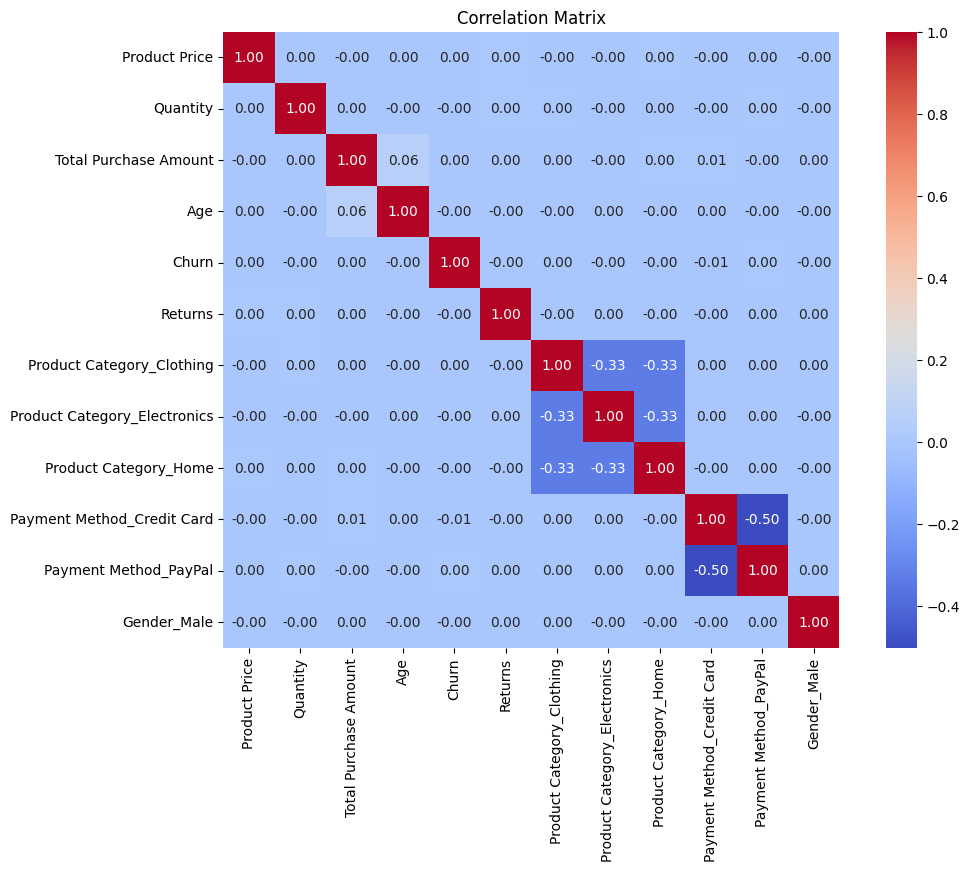

In [58]:
# correlation matrix
df_numeric = df[['Product Price', 'Quantity', 'Total Purchase Amount', 'Age', 'Churn', 'Returns']]
df_numeric['Churn'] = df_numeric['Churn'].astype(int)  # Convert 'Churn' to int for correlation
df_numeric['Returns'] = df_numeric['Returns'].astype(int)  # Convert 'Returns' to int for correlation
# categorical to dummy variables
dummies = pd.get_dummies(df[['Product Category', 'Payment Method', 'Gender']], columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)
df_numeric = pd.concat([df_numeric, dummies], axis=1)
df_numeric.head()
plt.figure(figsize=(12, 8))
cor_map = df_numeric.corr()
sns.heatmap(cor_map, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

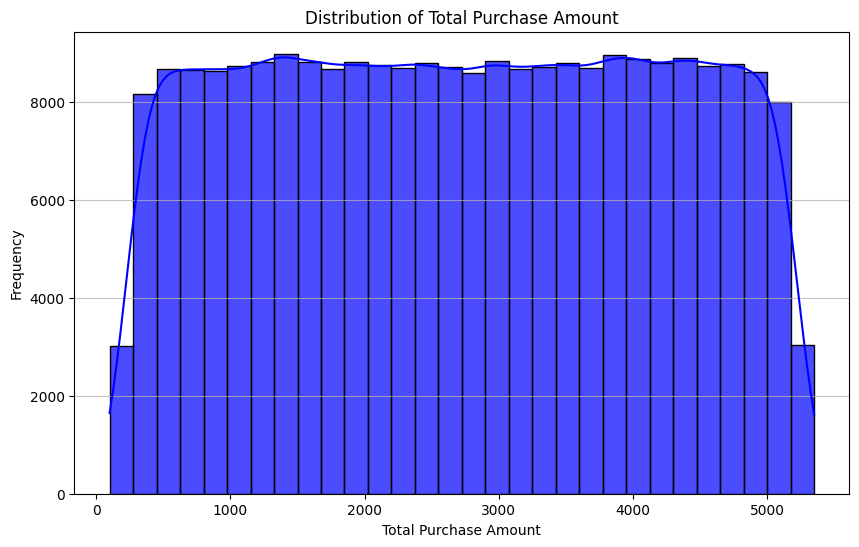

In [70]:
# to see the distribution of 'Total Purchase Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Purchase Amount'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [44]:
# Which product categories generate the highest total purchase amounts?
product_category_totals = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)
product_category_totals
# That is, customers who purchase "Home" tend to spend the most.

/var/folders/zd/56pqnjt95rd7ng30xkgt3wzw0000gn/T/ipykernel_58456/4214248628.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_totals = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)


Product Category
Home           171138916
Clothing       170716122
Electronics    170146025
Books          169345236
Name: Total Purchase Amount, dtype: int64

## Business Questions

### Question 1: Are there relationships between 'Payment Method', 'Gender' respect to 'Total Purchase Amount'?
- The plot and t-test suggest that customers using credit cards tend to spend differently compared to those using cash or PayPal.
- However, considering the fees of credit card transactions, it might not be more profitable even if the average purchase amount is higher.
- Next step:
    - to see if the payment methods are related to demographic factors.
    - to see if the churn rate and return rate are associated with payment method.

In [ ]:
group1 = df[df['Gender'] == 'Male']['Total Purchase Amount']
group2 = df[df['Gender'] == 'Female']['Total Purchase Amount']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# The p-value is greater than 0.05, indicating no significant difference in total purchase amounts between

T-statistic: 0.7523686291333156, P-value: 0.4518301151276066


/var/folders/zd/56pqnjt95rd7ng30xkgt3wzw0000gn/T/ipykernel_58456/4137987267.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Payment Method")["Total Purchase Amount"].mean().sort_values(ascending=False))


Payment Method
Credit Card    2738.852562
PayPal         2721.677952
Cash           2715.557437
Name: Total Purchase Amount, dtype: float64
  Payment Method 1 Payment Method 2  t-statistic   p-value
0           PayPal      Credit Card    -2.432306  0.015004
1           PayPal             Cash     0.865958  0.386515
2      Credit Card             Cash     3.293935  0.000988


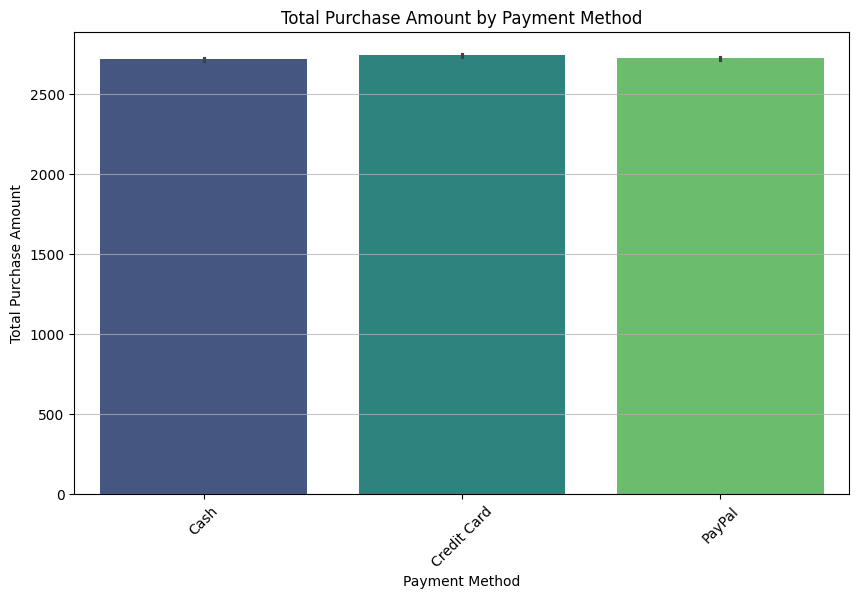

In [63]:
# Is there a relationship between 'Payment Method' and 'Total Purchase Amount'?
print(df.groupby("Payment Method")["Total Purchase Amount"].mean().sort_values(ascending=False))

# The difference of total purchase amount by payment method is not obvious by the bar plot.
# Run a t-test to see if there is a significant difference
payment_methods = df['Payment Method'].unique()
# Perform t-tests between pairs of payment methods
results = []
for i in range(len(payment_methods)):
    for j in range(i + 1, len(payment_methods)):
        method1 = payment_methods[i]
        method2 = payment_methods[j]
        group1 = df[df['Payment Method'] == method1]['Total Purchase Amount']
        group2 = df[df['Payment Method'] == method2]['Total Purchase Amount']
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        results.append((method1, method2, t_stat, p_value))
# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Payment Method 1', 'Payment Method 2', 't-statistic', 'p-value'])
print(results_df)

# Visualize the total purchase amount by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Total Purchase Amount', data=df, estimator=np.mean, palette='viridis', hue='Payment Method')
plt.title('Total Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

/var/folders/zd/56pqnjt95rd7ng30xkgt3wzw0000gn/T/ipykernel_58456/1268002274.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Total Purchase Amount', data=df, palette='Set2')


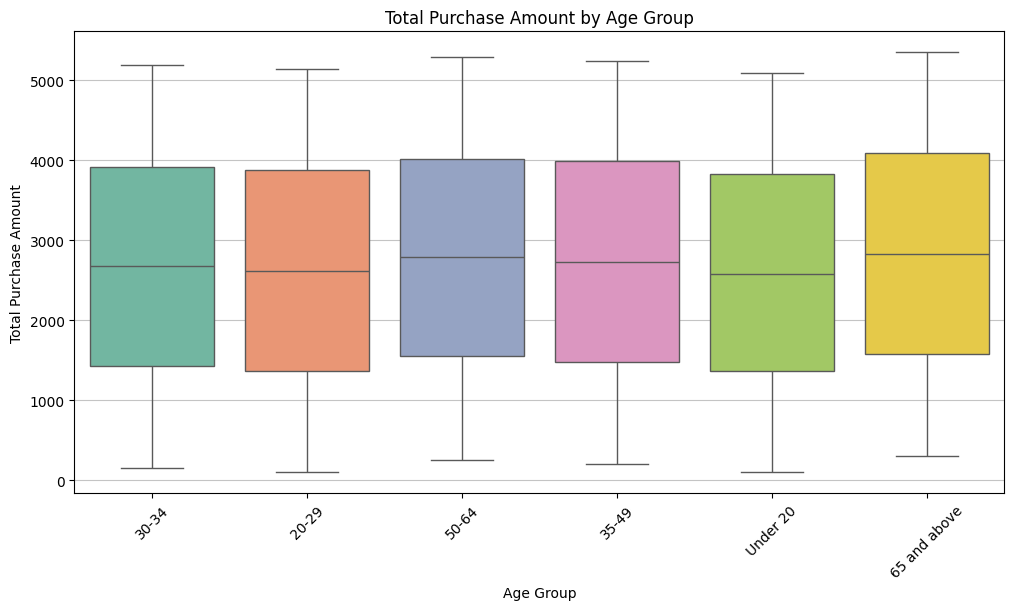

In [65]:
# create a new variable for age groups to seperate the age distribution
def age_group(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-34'
    elif 40 <= age < 50:
        return '35-49'
    elif 50 <= age < 60:
        return '50-64'
    else:
        return '65 and above'
df['Age Group'] = df['Age'].apply(age_group)
# Visualize the distribution of total purchase amount by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Total Purchase Amount', data=df, palette='Set2')
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Question 2: Can the returns be predicted based on the other features?
- [X] logistic regression
- [X] xgboost
- [X] lightgbm
- [X] random forest
- after trying all the models, it is shown that these models are not able to predict the returns accurately, as the AuC is around 0.5, which is no better than random guessing.
    - The features in the dataset may not be able to provide sufficient information to predict returns effectively.
    - The returns may be influenced by factors not captured in the dataset, such as customer behavior, product quality, or external market conditions.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [102]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    result_dict = {
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc": auc
    }
    return result_dict

In [103]:
X = df_numeric.drop(columns=['Returns'])
y = df_numeric['Returns']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# create a dictionary to map model names to the model objects
model_dict = {
    "logistic": LogisticRegression(max_iter=1000),
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "random_forest": RandomForestClassifier(),
    "lightgbm": LGBMClassifier()
}

results = []
# Iterate through the model dictionary and train each model
for model_name, model in model_dict.items():
    # Train and evaluate the model
    result_dict = train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name)
    results.append(result_dict)
results_df = pd.DataFrame(results)
results_df

/Users/changyenhua/Documents/Projects/demo-churn-analysis/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:02:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 81223, number of negative: 118777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406115 -> initscore=-0.380049
[LightGBM] [Info] Start training from score -0.380049


,model,accuracy,precision,recall,f1_score,auc
0,logistic,0.59494,0.000000,0.000000,0.000000,0.505574
1,xgboost,0.58730,0.405726,0.040587,0.073791,0.497118
2,random_forest,0.54626,0.396777,0.230978,0.291983,0.494993
3,lightgbm,0.59438,0.416667,0.003456,0.006856,0.497912


### Question 3: Can the customer churn be predicted based on the features?

1. step 1: Transfer the features into a new DataFrame with unique customer IDs
    - requency, total and average purchase amount by payment method
    - count of purchases by product category, amount spent by product category
2. step 2: Train and evaluate a model to predict customer churn

### Question 4: Can the transaction data be segmented with unsupervised learning methods to identify distinct customer groups?
- [ ] K-Means4
- [ ] Hierarchical Clustering
- [ ] DBSCAN